# Ритейл — Анализ программы лояльности

### Материалы:

Презентация: https://docs.google.com/presentation/d/1EEfYxD_0U0HGcVE1K_5BcYil8JaxhusKsKMwCRDBxTU/edit?usp=sharing

Дашборд:     https://public.tableau.com/views/FinalProject_16800105965220/sheet7?:language=en-US&:display_count=n&:origin=viz_share_link

ОПИСАНИЕ ДАННЫХ:\
Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». \
Все покупатели могут получить доступ в магазин с использованием персональных карт. \
За 200 рублей в месяц они могут стать участниками программы лояльности. \
В программу включены скидки, специальные предложения, подарки.

ЗАДАЧИ ПРОЕКТА:\
Провести исследовательский анализ данных;\
Провести анализ программы лояльности;\
Сформулировать и проверить статистические гипотезы.\
Оценить возможности развития программы лояльности.

## Загрузка данных.

In [69]:
#загрузим нужные библиотеки
import pandas as pd
import numpy as np
from numpy import mean
import warnings
import math as mth
import datetime as dt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import graph_objects as go 
warnings.simplefilter("ignore")

В нашем распоряжении два датасета:\
retail_dataset.csv - журнал продаж\
product_codes.csv - стоимость товара

In [70]:
#загрузим данные
try:
   product, retail = (
    pd.read_csv("C:\\Users\\kirio\\OneDrive\\Рабочий стол\\ЯПрактикум\\14_Выпускной Проект\\product_codes.csv", sep=','), #стоимость товара
    pd.read_csv('C:\\Users\\kirio\\OneDrive\\Рабочий стол\\ЯПрактикум\\14_Выпускной Проект\\retail_dataset.csv', sep=',') #журнал продаж
)
except:
   product, retail = (
    pd.read_csv('https://code.s3.yandex.net/datasets/product_codes.csv', sep=','), #стоимость товара
    pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset.csv', sep=',') #журнал продаж
)

### Изучение датасетов

In [71]:
# функция для вывода информации о датасетах
def gen_info(data):
    data.info()
    display(data.head())

retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

In [72]:
#журнал продаж
gen_info(retail)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

In [73]:
#стоимость товара
gen_info(product)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


В датасете retail_dataset, журнала продаж 105335 строк, 7 столбцов. Три типа данных: object, float64 и int64. В столбце 'CustomerID' есть пропущенные значения.\
В датасете product_codes, стоимости товара 9969 строк, два столбца. Два типа данных: object и float64. Пропусков нет.

Для выявления ошибок в данных посмотрим на категориальные и числовые значения.\
Для  числовых используем describe(), показывающий распределение величин,\
а для  категориальных  метод value_counts(), показывающий значения и их количество.

In [74]:
# распределение велечин для retail, product

#код тимлида

#берем сразу две таблицы
for t in [retail, product]:
#и перебираем все столбцы
    for col in t.columns:
        print(col)
        if type(t[col]) is 'float64':
            print(t[col].describe(), sep='\n')
        else:
            print(t[col].value_counts(), '\n', sep='\n')

purchaseid
537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
C538081      1
539828       1
542545       1
C544427      1
C542139      1
Name: purchaseid, Length: 4894, dtype: int64


item_ID
85123A    565
22423     499
22469     414
22720     377
85099B    372
         ... 
84539       1
84968f      1
35265       1
84536b      1
35832       1
Name: item_ID, Length: 3159, dtype: int64


Quantity
 0       33055
 1       16258
 11      10311
 5        7979
 2        7460
         ...  
-291         1
 669         1
 94          1
 2591        1
 1727        1
Name: Quantity, Length: 301, dtype: int64


purchasedate
2016-12-06 16:57:00    675
2016-12-09 14:09:00    652
2016-12-10 14:59:00    621
2016-12-07 15:28:00    601
2016-12-06 09:58:00    597
                      ... 
2017-02-04 14:02:00      1
2016-12-03 14:19:00      1
2017-01-07 09:23:00      1
2017-01-13 10:28:00      1
2017-02-17 12:56:00      1
Name: purchasedate, Length: 4430, dtype: in

### Выводы по датасетам:
Всего 4894 чеков purchaseid, самое большое количество товаров в чеке '537434' - 675.\
Уникальных товаров item_ID и productID всего 3159, это число в датасетах одинаково.\
Всего в сети 31 магазин, столбец ShopID, наибольшее количество покупок в Shop 0, возможно это онлайн магазин.\
Уникальных покупателей CustomerID - 1749, наибольшее количество товаров у одного покупателя - 796. \
Большинство покупок совершается без программы лояльности (ПЛ), по ПЛ куплено примерно 23% товаров.\
По распределению количества товаров Quantity среднее значение 7, есть отрицательные значения, возможно это возвраты.\
Максимальные и минимальные значения: 74214 и -74216, возможно это выбросы.\
Нулевое количество, возможно, при получении данных были ошибки.\
Цены товара price_per_one, распределение  выглядит нормально:\
среднее значение 19.5, медианное 2.55, минимальная цена - 0, возможно это товары по акции, которые идут в подарок или ошибки в данных.\
Максимальная цена - 16888, это либо дорогой товар либо выброс.

## Предобработка данных.   

### Переименование столбцов.

In [75]:
#переименуем названия столбцов
retail = retail.rename(
   columns={
       'purchaseid': 'purchase_id',\
       'item_ID': 'item_id',\
       'Quantity': 'quantity',\
       'purchasedate': 'purchase_date',\
       'CustomerID': 'customer_id',\
       'ShopID': 'shop_id'\
   }
)
product = product.rename(columns={'productID': 'item_id', 'price_per_one':'price'}).reset_index(drop=True)

### Дубликаты.

In [76]:
#количество явных дубликатов в датафреймах
print('Число дубликатов retail:', retail.duplicated().sum())
print('Число дубликатов product:', product.duplicated().sum())

Число дубликатов retail: 1033
Число дубликатов product: 0


Дубликаты есть. Их небольшое количество, всего 0,98%. Избавимся от них.

In [77]:
#удалим из датафрейма строки с дубликатами, оставив только первые вхождения: будем считать, что верные идентификаторы встречаются первыми
retail = retail.drop_duplicates(keep='first').reset_index(drop=True)
#количество явных дубликатов в датафреймах
print('Число дубликатов retail:', retail.duplicated().sum())
print('Число дубликатов product:', product.duplicated().sum())

Число дубликатов retail: 0
Число дубликатов product: 0


In [78]:
#количество строк после удаления дубликатов
retail.shape

(104302, 7)

### Преобразование типов данных.

In [79]:
#преобразуем типы данных в столбцах purchase_date к дате b loyalty_program в int  
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])
retail['loyalty_program'] = retail['loyalty_program'].astype('int')

### Исследование пропущенных значений.

In [80]:
#количество пропусков в столбце customer_id
retail['customer_id'].isna().sum()

36148

In [81]:
# % пропусков в столбце customer_id
pd.DataFrame(round(retail.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
purchase_id,0.000000
item_id,0.000000
quantity,0.000000
purchase_date,0.000000
customer_id,35.000000
shop_id,0.000000
loyalty_program,0.000000


In [82]:
#незарегистрированных пользователей не участвующих в программе лояльности 
retail.query('loyalty_program == 0')['customer_id'].isna().sum()

36148

Треть (35%) пользователей совершили покупки без регистрации (количество: 36148) и все они не участвуют в программе лояльности.\
В нашем исследовании гипотезы основаны на следующих метриках: средний чек, среднее количество покупок и выручка которую  клиент в среднем принёс компании.\
Все они рассчитываются на каждого клиента, в случае замены на "заглушки", отсутствующие значения могут быть интерпретированы как действия одного клиента с множеством покупок.\
Удалить или "заглушить" 35% датасета неприемлемо - исказятся данные клиентов не участвующих в программе лояльности.

In [83]:
#заменим пропуски на уникальные purchase_id
retail['customer_id'] = retail['customer_id'].fillna(retail['purchase_id'])
#выведем количество уникальных пользователей по группе лояльности
retail.groupby('loyalty_program').agg({'customer_id':'nunique'})

,customer_id
loyalty_program,
0,1910
1,587


### Добавление столбцов.

In [84]:
#добавим новые столбцы в с днями недели
retail['weekday'] = retail['purchase_date'].dt.weekday
#retail['date']=pd.to_datetime(retail['purchase_date'].dt.strftime('%Y-%m-%d'))
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,weekday
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,5
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,3
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,0


### Вывод:
На данном этапе мы привели  значения столбцов к нужному формату, проиндексировали датафремы и изменили названия столбцов для удобства работы.\
Добавили два новых столбца с датой и днями недели. Удалили явные дубликаты.\
Данные прошли предобработку и соответствуют необходимому уровню качества для дальнейшего интеллектуального анализа и проверке гипотез.

## Исследовательский анализ данных (EDA).

### Выявление аномалий и выбросов.

In [85]:
#посмотрим на рапределение цены price в таблице product
product['price'].describe()


count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price, dtype: float64

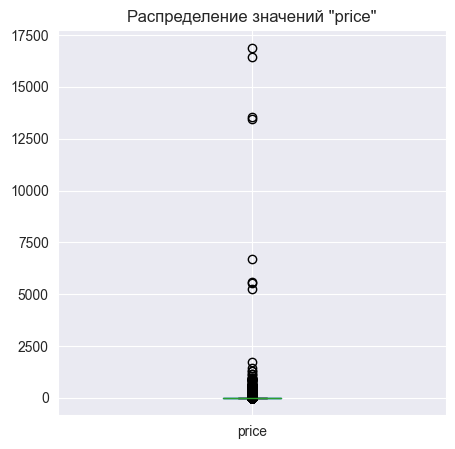

In [86]:
#построим боксплот
product.boxplot(column='price', figsize=(5,5))
plt.title('Распределение значений "price"')
plt.show()

Диаграмма "ящик с усами" показывает, что много значений распологаются вблизи 0. Есть выбросы.

In [87]:
#посмотрим на товар с самой высокой ценой
max_price = product['price'].max()
product.query('price == @max_price')

,item_id,price
6133,AMAZONFEE,16888.02


In [88]:
#выведем этот товар
product.query('item_id == "AMAZONFEE"')

,item_id,price
3891,AMAZONFEE,1.00
3931,AMAZONFEE,13541.33
4089,AMAZONFEE,13474.79
4094,AMAZONFEE,5519.25
4095,AMAZONFEE,6706.71
6133,AMAZONFEE,16888.02
6134,AMAZONFEE,16453.71
9732,AMAZONFEE,5575.28
9733,AMAZONFEE,5258.77


У AMAZONFEE 9 разных цен. Возможно, это разные товары с Амазона, но id у них одинаковый.\
Сгруппируем товары и посмотрим количество значений цен товара.

In [89]:
#сгруппируем и отсортируем по убыванию
product.groupby('item_id').agg({'price': 'nunique'}).sort_values(by='price', ascending=False)

,price
item_id,
DOT,174
M,59
S,29
POST,15
D,13
...,...
85018C,1
85018D,1
85019B,1


Все товары обладают уникальным номером - артикулом, большинство из которых начинаются с цифровых значений, есть и текстовые.\
Возможно это товары с доставкой, отправленные по почте и т.д.

In [90]:
#количество нулевых цен
len(product.query('price == [0]'))

382

У многих товаров несколько ценовых значений. Есть 382 нулевых, вероятно это акционный или подарочный товар. 

Сгруппируем таблицу  по item_id и посчитаем медианную цену.\
Очистим данные от выбросов, посчитав 99-й квантиль, отфильтруем по нему датасет.

In [91]:
# группируем по item_id
product = product.pivot_table(
    index='item_id', values='price', aggfunc='median').reset_index()

# расчет границы выбросов
upper_border = product['price'].quantile(0.99)
print('Граница выбросов:', upper_border)
print('Доля выбросов:', round(
    len(product.query('price > @upper_border'))/len(product), 2))

# фильтрация выбросов
product = product.query('price <= @upper_border')
product

Граница выбросов: 27.03560000000027
Доля выбросов: 0.01


,item_id,price
0,10002,1.630
1,10080,0.850
2,10120,0.210
3,10123C,0.650
4,10124A,0.420
...,...,...
3152,POST,12.990
3153,S,12.950
3154,gift_0001_20,16.845
3155,gift_0001_30,25.265


Датасет product отфильтрован от выбросов, граница выбросов 27.035, теперь в нем 3127 строк.

Перейдем к обработке датасета retail. Выведем распределение значений quantity - количества товара.

In [92]:
#распредиление числовых значений
retail['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

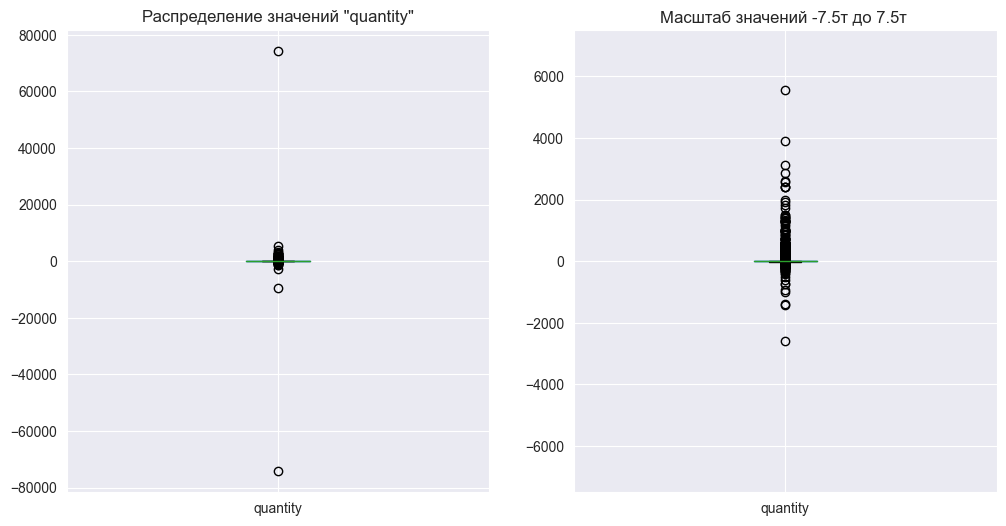

In [93]:
#Построим боксплоты с разными диапазонами 
fig, axes = plt.subplots(1, 2, figsize=(12,6))

retail.boxplot(column='quantity', ax=axes[0])
axes[0].set_title('Распределение значений "quantity"')


retail.boxplot(column='quantity', ax=axes[1])
axes[1].set_title('Масштаб значений -7.5т до 7.5т ')
plt.ylim(-7500, 7500)

plt.show()

По диаграмме видно, что весь "ящик с усами" распологается около 1000.\
Нулевое количество товара возможно если это ошибка пробития в чеке, отмена покупки и товар не приобретен, возможно ошибки в сборе данных.

In [94]:
#выведем количество 0 строк и отфильтруем датасет
print('Число строк с нулевым количеством товара:', retail.query('quantity == 0').shape[0])
retail = retail.query('quantity != 0')

Число строк с нулевым количеством товара: 32362


Нет смысла работать со строками с нулевым количеством, при умножении на 0, стоимость у них будет тоже 0.\
Удалили 32362 строки с 0 количеством товара. Это треть датасета. Вопрос к коллегам занимающихся сбором данных.

In [95]:
#посмотрим на строки с максиамальным и минимальным количесвом товаров
quantity_max = retail['quantity'].max()
quantity_min = retail['quantity'].min()
retail.query('quantity == @quantity_max or quantity == @quantity_min')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,weekday
49166,C541433,23166,-74216,2017-01-18 10:17:00,18025.0,Shop 0,0,2
68612,541431,23166,74214,2017-01-18 10:01:00,18025.0,Shop 0,0,2


Это покупки одного покупателя '18025'. Сначала было куплено 74214 едениц товара '541431', а отрицательное значение это возврат 74216 товаров.\
Странно, что вернули, больше, чем купили.

Видим возвратный чек с литерой "С", выведем все подобные чеки.

In [96]:
#чеки с отрицательным количеством
retail.query('quantity < 0')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,weekday
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,Shop 0,0,4
109,C542910,20726,-2,2017-02-01 15:38:00,23190.0,Shop 0,1,2
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,Shop 0,0,5
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,Shop 0,1,2
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,Shop 0,0,2
...,...,...,...,...,...,...,...,...
104132,C541650,M,-2,2017-01-20 11:44:00,C541650,Shop 0,0,4
104143,C540246,79320,-2,2017-01-05 15:43:00,18760.0,Shop 0,0,3
104180,C539467,22801,-2,2016-12-19 12:46:00,20723.0,Shop 0,0,0
104217,C540847,22197,-3,2017-01-11 17:35:00,19137.0,Shop 0,0,2


Действительно, все чеки с возвратом, начинаются на букву "C", их 2 тысячи. Возвраты в данных оставим. Отфильтруем выбросы.

Рассчитаем выбросы, используем межквартильный размах (IQR). Это разница между Q3 и Q1.\
Редкие значения будут меньше Q1 - 1.5 * IQR, а выбивающиеся значения больше Q3 + 1.5 * IQR.\
Для наших значений используем коэффицент 3.

In [97]:
q1 = retail['quantity'].quantile(0.25)
q3 = retail['quantity'].quantile(0.75)
iqr = q3 - q1
# границы интервала наиболее вероятных значений
lower_border = q1 - 3 * iqr
upper_border = q3 + 3 * iqr
# вывод границ и доли выбросов
print(f'Границы выбросов: {lower_border}, {upper_border}')
print('Доля выбросов:', round(
    len(retail.query('quantity < @lower_border or quantity > @upper_border'))/len(retail), 4))

Границы выбросов: -29.0, 41.0
Доля выбросов: 0.0487


Границы выбросов quantity -29 и 41. Доля значений, которую мы удалим по этим границам, будет 4,87%.

In [98]:
# фильтрация выбросов
retail = retail.query('quantity >= @lower_border and quantity <= @upper_border')
retail

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,weekday
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,5
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2
7,541424,79321,1,2017-01-17 17:57:00,541424,Shop 0,0,1
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,3
11,541696,22197,4,2017-01-20 18:08:00,541696,Shop 0,0,4
...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,540154,Shop 0,0,3
104297,538566,21826,1,2016-12-13 11:21:00,538566,Shop 0,0,1
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,4
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,5


Обработанный от пропусков и выбросов датасет retail содержит 68434 строки. Отфильтровано много, зато теперь, данные чистые.

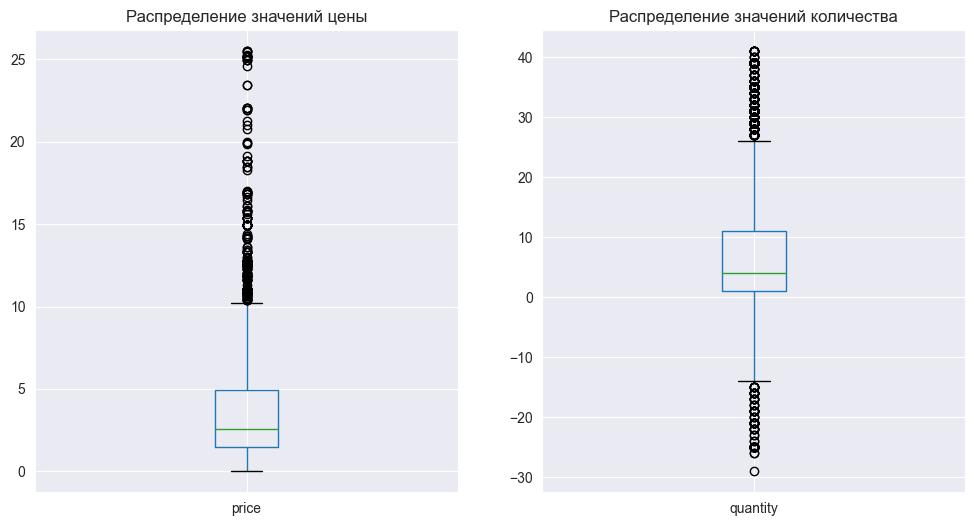

In [99]:
#Построим боксплоты для product 'price' и retail 'quantity'
fig, axes = plt.subplots(1, 2, figsize=(12,6))

product.boxplot(column='price', ax=axes[0])
axes[0].set_title('Распределение значений цены')

retail.boxplot(column='quantity',ax=axes[1])
axes[1].set_title('Распределение значений количества')

plt.show()

Без нулей и выбросов значения читаемы. Теперь можно объеденить данные в одну таблицу.

### Объединение журнала продаж и стоимости товара.

Объеденим таблицы по id товара. Итоговую цену чека, посчитаем в столбце total, помноженную на количество из столбца quantity.

In [100]:
#объединение таблиц
data = retail.merge(product, on='item_id', how='left')
# расчет стоимости
data['total'] = data['price'] * data['quantity']
#посчитаем товары без цены
data['total'].isna().sum()

127

In [101]:
# удаляем строки без цены
data = data.query('not price.isna()')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68307 entries, 0 to 68433
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      68307 non-null  object        
 1   item_id          68307 non-null  object        
 2   quantity         68307 non-null  int64         
 3   purchase_date    68307 non-null  datetime64[ns]
 4   customer_id      68307 non-null  object        
 5   shop_id          68307 non-null  object        
 6   loyalty_program  68307 non-null  int32         
 7   weekday          68307 non-null  int64         
 8   price            68307 non-null  float64       
 9   total            68307 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 5.5+ MB


In [102]:
#выведем датасет
data

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,weekday,price,total
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,5,1.630,17.930
1,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2,1.630,11.410
2,541424,79321,1,2017-01-17 17:57:00,541424,Shop 0,0,1,5.750,5.750
3,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,3,5.205,26.025
4,541696,22197,4,2017-01-20 18:08:00,541696,Shop 0,0,4,1.240,4.960
...,...,...,...,...,...,...,...,...,...,...
68429,540154,22134,3,2017-01-05 11:30:00,540154,Shop 0,0,3,0.630,1.890
68430,538566,21826,1,2016-12-13 11:21:00,538566,Shop 0,0,1,2.460,2.460
68431,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,4,8.330,8.330
68432,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,5,0.830,9.130


Запишем в отдельную переменную данные о покупках, без возратов.

In [103]:
#отделим данные о покупках, без возратов
data_purchase = data.query('quantity >= 0')

### Вывод:
Строки с нулями в количестве товаров quantity и цены price были удалены, что составило треть от данных.\
Эти же переменные были почищены от выбросов, в таблице retail отфильтровано 4,9%, в таблице product 1%.\
Разброс цен в price приведен к медиане. Два датасета были объединены в data. В столбце total расчитана общая стоимость (цена * количество).\
Отфильтровано 146 строк, для которых цена неизвестна.\
В таблице data 68288 строк, 11 столбцов.

### Исследование по дате продаж.

In [104]:
#временной период 
data['purchase_date'].describe()

count                   68307
unique                   3962
top       2016-12-06 16:57:00
freq                      331
first     2016-12-01 08:26:00
last      2017-02-28 17:01:00
Name: purchase_date, dtype: object

Построим гистограмму для значения даты и дня недели по всем строкам - это будет количество товаров.\
Построим гистограмму для чеков - покупок, сгруппировав таблицу по purchase_id.\
Для визуализации используем plotly.

In [105]:
#гистграмма для товаров по дате
fig = px.histogram(data_purchase, x="purchase_date", title = 'Распределение товаров по дате', nbins=100)
fig.update_layout(yaxis_title="Количество товаров", xaxis_title="Дата")
fig.show()

#гистграмма для покупок по дате
fig = px.histogram(data_purchase.groupby('purchase_id').agg({'purchase_date': 'max'}), 
                   x="purchase_date", title = 'Распределение покупок по дате', nbins=100)
fig.update_layout(yaxis_title="Количество покупок", xaxis_title="Дата")
fig.show()

In [106]:
#гистграмма для товаров по дню недели
fig = px.histogram(data_purchase, x="weekday", title = 'Распределение товаров по дню недели', nbins=7)
fig.update_layout(yaxis_title="Количество товаров", xaxis_title="День недели",
                  height=300,
                  width=700)
fig.show()

#гистграмма для покупок по дню недели
fig = px.histogram(data_purchase.groupby('purchase_id').agg({'weekday': 'max'}), 
                   x="weekday", title = 'Распределение покупок по дню недели', nbins=7)
fig.update_layout(yaxis_title="Количество покупок", xaxis_title="День недели",
                  height=300,
                  width=700)
fig.show()

### Вывод:
Набор данных за период (три месяца): с 2016-12-01 по 2017-02-28. Покупок гораздо меньше, чем товаров, что видно на графиках по оси y - количеству.

По графикам видно - в первой половине декабря покупок в 2 раза больше, чем в следующие месяцы. Сезонный, высокой спрос перед праздниками.\
Отсутствуют покупки в период с 24 декабря по 3 января, во многих странах это Рождественские праздники.\
Воскресенье - выходной день. В пятницу покупают больше, чем в остальные дни.\
По товарам есть пик во вторник, видимо активны оптовые (строительные организации, ИП) покупатели.


### Исследование продаж по магазинам.

Рассмотрим данные о покупках data_purchase. Сгруппируем датасет по магазинам shop_id.\
Выведем топ-10 по числу чеков purchase_id, числу проданных товаров quantity и сумме выручки total.\
Построим столбчатые диаграммы.

In [107]:
# таблица по магазинам
shop = data_purchase.groupby('shop_id').agg(
    {'purchase_id': 'nunique', 'quantity': 'sum', 'total': 'sum'}
).reset_index()
shop['total'] = shop['total'].round(1)

In [108]:
#функция для получения столбчатой диаграммы
def gen_shop(column='purchase_id', title='График'):
    plt.figure(figsize=(8,4))
    #топ-10 по данному столбцу
    sns.barplot(x="shop_id", y=column, data=shop.sort_values(by=column, ascending=False).head(10))
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Магазины')
    plt.show()

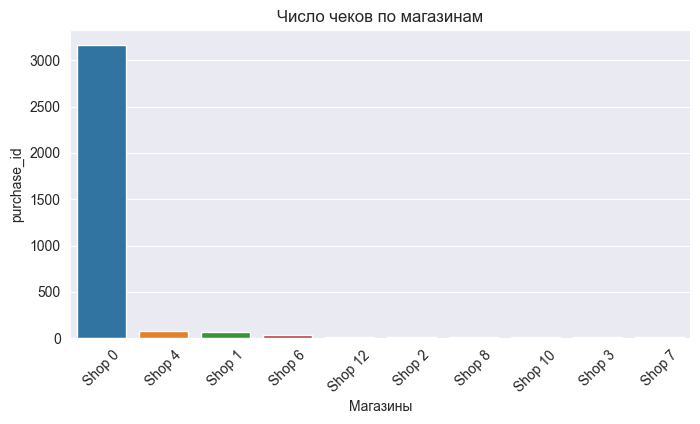

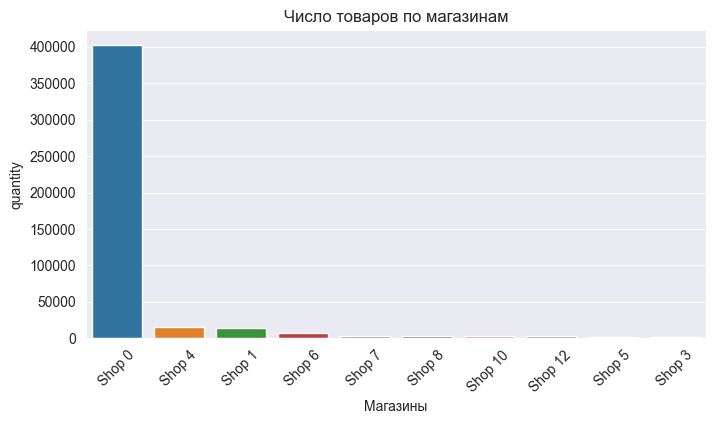

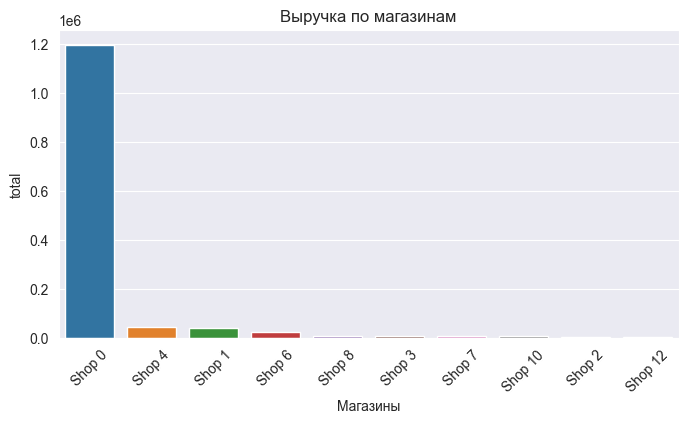

In [109]:
# вызов функции
gen_shop('purchase_id', 'Число чеков по магазинам')
gen_shop('quantity', 'Число товаров по магазинам')
gen_shop('total', 'Выручка по магазинам')

In [110]:
# вывод сводной таблицы
shop.sort_values(by=['purchase_id', 'quantity', 'total'], ascending=False).head(10)

,shop_id,purchase_id,quantity,total
0,Shop 0,3165,402628,1196908.2
24,Shop 4,79,16072,47598.0
1,Shop 1,70,14653,40924.5
26,Shop 6,36,7519,26144.1
4,Shop 12,16,2404,6029.2
12,Shop 2,15,1492,6615.6
28,Shop 8,14,3489,10878.0
2,Shop 10,12,2648,9040.5
22,Shop 3,11,2088,9443.5
27,Shop 7,10,3594,9303.2


### Вывод:
Магазин "Shop 0" лидирует по параметрам продаж с большим отрывом.\
Вероятно самый большой, через него могут проходить онлайн-заказы с самовывозом и доставкой.\
В "Shop 0" количество чеков в 40 раз больше, чем в других магазинах.\
В топ-5 по количеству покупок также входят магазины № 4, 1, 6 и 12. В топ-5 по выручке № 4, 1, 6 и 8.

### Исследование продаж по покупателю

Сгруппируем данные по покупателю customer_id.\
Рассчитаем количество чеков, товаров, сумму потраченных денег.\
Напишем функцию для построения гистограмм по полученным данным.\
Возвраты учитывать не будем.

In [111]:
# сводная таблица
customer = data_purchase.groupby('customer_id').agg(
    {'purchase_id': 'nunique', 'quantity': 'sum', 'total': 'sum'})

In [112]:
# функция построения гистограмм
def gen_hist(data, column, title):
    data[column].hist(figsize=(10, 5), bins=100)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

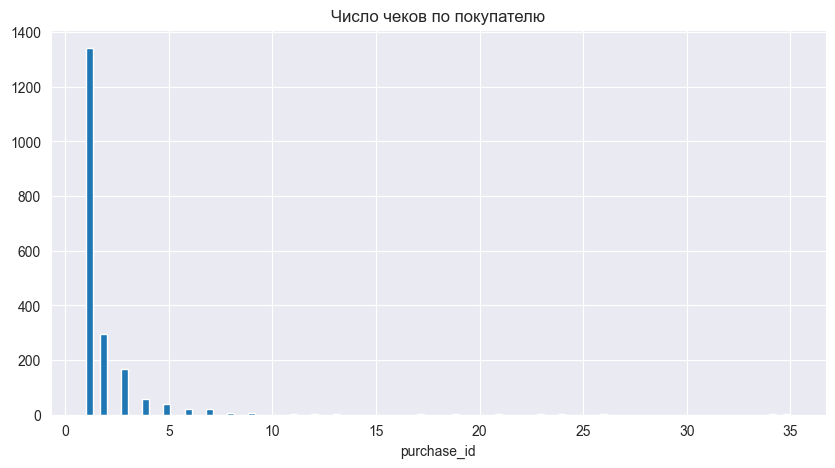

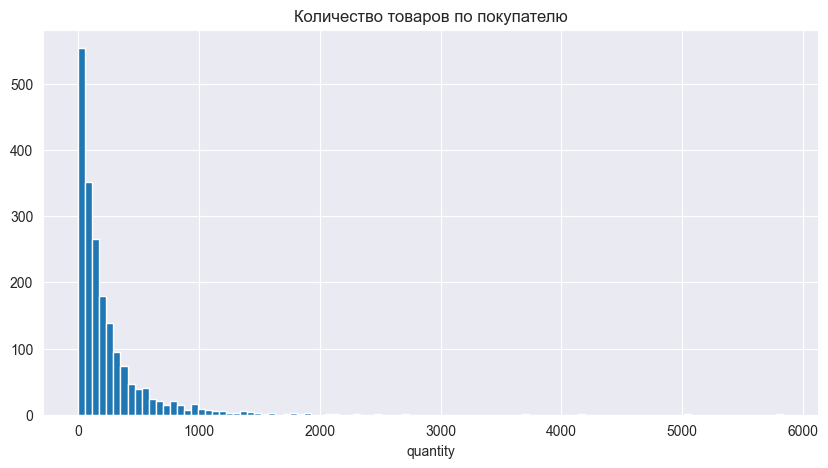

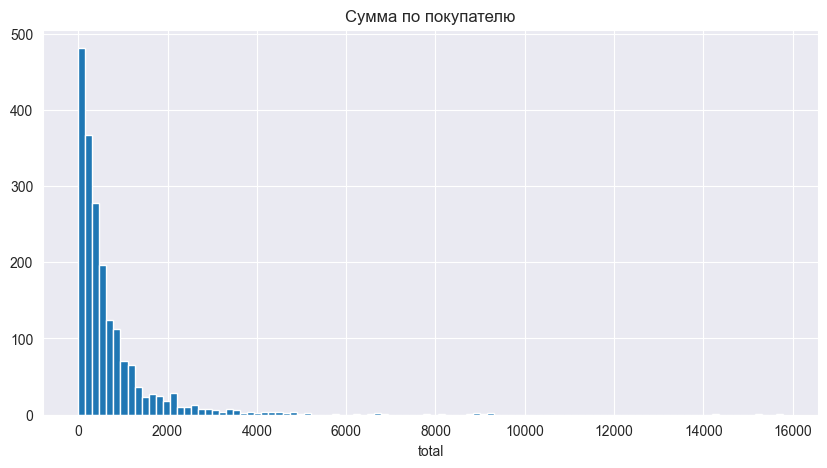

In [113]:
# вызов функции
gen_hist(customer, column='purchase_id', title='Число чеков по покупателю')
gen_hist(customer, column='quantity', title='Количество товаров по покупателю')
gen_hist(customer, column='total', title='Сумма по покупателю')

In [114]:
#числовые характеристики
customer.describe().round(1)

,purchase_id,quantity,total
count,1966.0,1966.0,1966.0
mean,1.8,239.1,716.3
std,2.1,358.3,1135.7
min,1.0,1.0,0.0
25%,1.0,51.0,160.9
50%,1.0,133.5,386.0
75%,2.0,285.5,832.7
max,35.0,5832.0,15775.2


### Вывод:
Всего 1966 покупателей.\
Графики количества товаров и суммы чека  по покупателю распределены как случайная величина, значит данные в порядке.\
Максимальное число покупок (чеков) - 35, число товаров 5832. Минимальная сумма чеков 1.0, максимальная 15775.\
Средние значения: число чеков 1.9; количество товаров 239; потраченная сумма 716.

### Исследование продаж по чекам.

Сгруппируем данные по чекам, посчитаем: общее количество товаров, число уникальных товаров, сумму чека.\
Сохраним значения в переменную purchase. Выведем числовые характеристики распределений методом describe\
Построим гистограммы с помощью функции gen_hist\
Возвраты учитывать не будем

In [115]:
# сводная таблица 
purchase = data_purchase.groupby('purchase_id').agg(
    {'quantity': 'sum', 'item_id': 'nunique', 'total': 'sum'}
).reset_index()
purchase['total'] = purchase['total'].round(1)

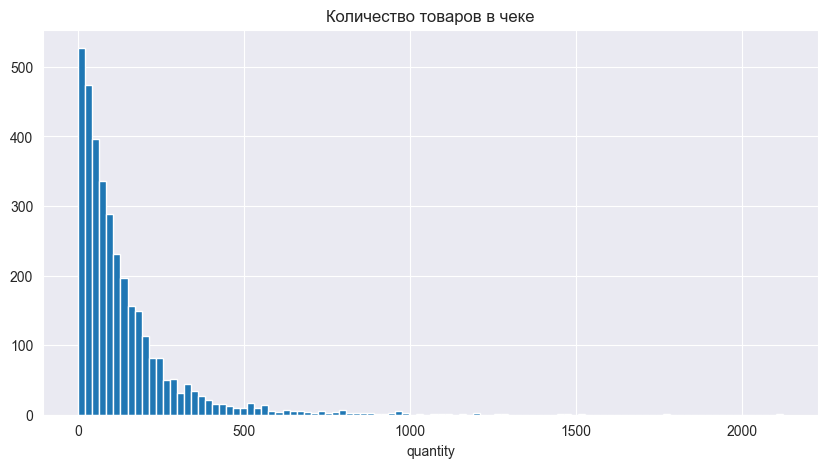

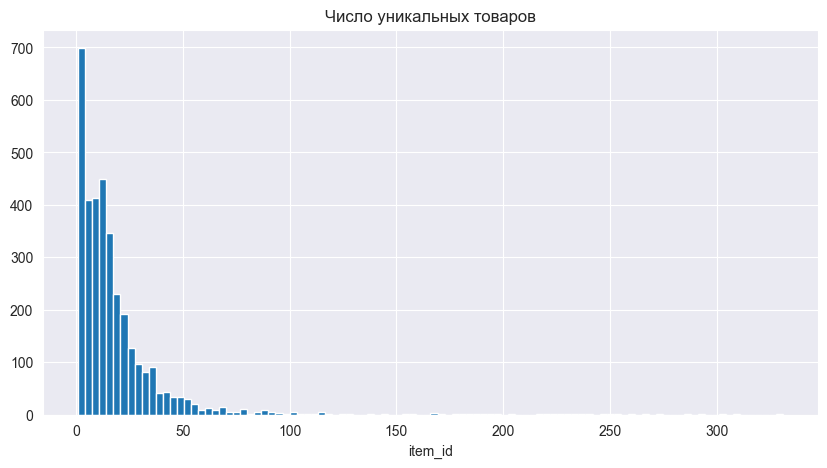

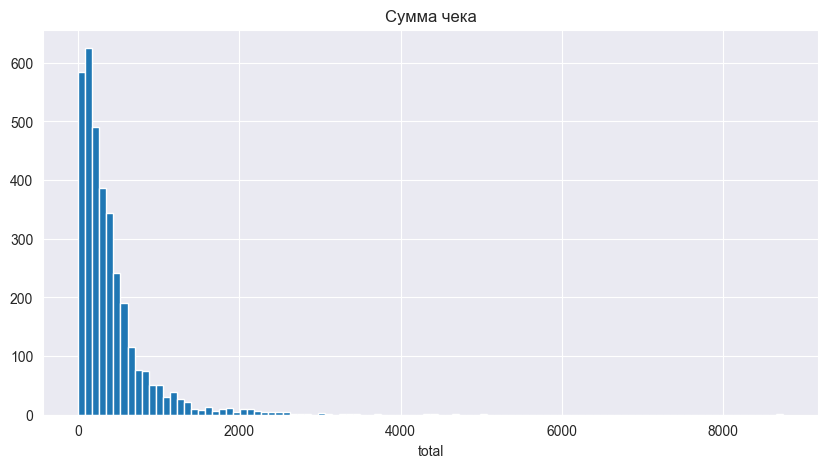

In [116]:
# вызов функции
gen_hist(purchase, column='quantity', title='Количество товаров в чеке')
gen_hist(purchase, column='item_id', title='Число уникальных товаров')
gen_hist(purchase, column='total', title='Сумма чека')

In [117]:
#числовые характеристики
purchase.describe().round(1)

,quantity,item_id,total
count,3481.0,3481.0,3481.0
mean,135.0,19.0,404.5
std,164.3,28.5,491.1
min,1.0,1.0,0.0
25%,37.0,6.0,126.4
50%,86.0,12.0,270.4
75%,171.0,22.0,496.1
max,2124.0,331.0,8743.8


In [118]:
#количество чеков
data['purchase_id'].nunique()

4320

### Вывод:
Средний чек, составляет 404. Медианное значение - 270\
Все распределения на гистограммах имеют пиковые значения в начале.\
Графики количества товаров и суммы чека похожи на распределения Пуассона, как случайная величина, значит данные в порядке.\
Число уникальных товаров, чаще значения меньше 5, в начале сильный пик.\
Среднее количество товаров в чеке - 135, медианное - 86. Среднее смещается из-за чеков с большим количеством товаров.\
Среднее число уникальных товаров в чеке - 19, медианное 12.


### Выводы:

На этапе исследовательского анализа данных, были исследованы зависимости и распределения параметров.

В датасете данные от 1 декабря 2016 года до 28 февраля 2017 года - 3 месяца.\
Сеть строительных магазинов не работает по воскресеньям, были рождественские каникулы 24 декабря - 3 января.\
Перед праздниками покупок было больше.

Магазин "Shop 0" лидирует по всем параметрам продаж.\
Возможно он основной и самый большой, через него могут проходить онлайн-заказы с самовывозом и доставкой.\
Количество покупок в 40 раз больше, чем в других магазинах.\
По количеству покупок и выручке среди остальных магазинов популярнее № 4, 1, 6, 8, 12.

Всего 4320 чеков, из них 3473 чеков покупок. Средний чек, составляет 404. Медианное значение - 270\
Среднее количество товаров в чеке - 135, среднее число уникальных товаров в чеке - 19

Всего 1966 покупателей. Средние значения: число чеков 1.9, количество товаров 239, средняя потраченная сумма 716.

## Анализ программы лояльности

Рассмотрим отдельно группы клиентов в программе лояльности и остальных, это признак loyalty_program, будем использовать только покупки без возвратов.

### Сводная таблица средних значений по группам

In [119]:
#сводная таблица
lp_groupby = data_purchase.groupby('loyalty_program').agg(
    {'purchase_id': 'nunique', 'customer_id': 'nunique', 'quantity': 'mean', 'price': 'mean', 'purchase_date': 'min'})
#переименуем столбцы
lp_groupby = lp_groupby.rename(
    {'purchase_id': 'Число чеков', 'customer_id': 'Число клиентов', 'quantity': 'Среднее число товаров',
    'price': 'Средняя цена товара', 'purchase_date': 'Дата и время первого чека'}, axis=1).round(1)
#добавим столбец % от всех пользователей
lp_groupby['% от всех клиентов'] = (lp_groupby['Число клиентов']/(data_purchase['customer_id'].nunique())*100).round(1)
lp_groupby


,Число чеков,Число клиентов,Среднее число товаров,Средняя цена товара,Дата и время первого чека,% от всех клиентов
loyalty_program,,,,,,
0,2420,1423,7.1,3.8,2016-12-01 08:34:00,72.4
1,1061,543,7.1,3.9,2016-12-01 08:26:00,27.6


Клиентов с программой лояльности 33.7%. Среднее число товаров - 7 и средняя цена товара - 4 у обеих выборок схожи.\
Пока не видно особой разницы в покупках клиентов по программе лояльности с остальными.

### Распределение по покупкам

Проведем анализ по покупкам, с группировкой по purchase_id. Все остальные переменные агрегируем, переименуем столбцы.

In [120]:
# сводная таблица 
df_purchase = data_purchase.groupby('purchase_id').agg(
    {'customer_id': 'max', 'item_id': 'nunique', 'quantity': 'sum', 'price': 'mean', 'total': 'sum', 
     'shop_id': 'max', 'purchase_date': 'max', 'loyalty_program': 'max'}
).reset_index()
# округлим цены
df_purchase[['price', 'total']] = df_purchase[['price', 'total']].round(1)
# переименуем столбцы
df_purchase.columns = ['Чек', 'Покупатель', 'Уник. товары', 'Все товары', 
                            'Ср. цена за товар', 'Сумма чека', 'Магазин', 'Дата', 'ПЛ']
df_purchase

,Чек,Покупатель,Уник. товары,Все товары,Ср. цена за товар,Сумма чека,Магазин,Дата,ПЛ
0,536365,23529.0,7,33,6.6,186.5,Shop 0,2016-12-01 08:26:00,1
1,536366,23529.0,2,10,2.0,19.8,Shop 0,2016-12-01 08:28:00,1
2,536367,18726.0,12,71,5.8,285.4,Shop 0,2016-12-01 08:34:00,0
3,536368,18726.0,4,11,9.7,96.1,Shop 0,2016-12-01 08:34:00,0
4,536369,18726.0,1,2,6.6,13.2,Shop 0,2016-12-01 08:35:00,0
...,...,...,...,...,...,...,...,...,...
3476,545214,22844.0,10,90,4.7,218.7,Shop 0,2017-02-28 16:39:00,1
3477,545215,545215,78,239,2.9,621.3,Shop 0,2017-02-28 16:47:00,0
3478,545216,545216,46,190,2.8,539.4,Shop 0,2017-02-28 16:50:00,0
3479,545217,545217,48,189,2.5,479.6,Shop 0,2017-02-28 16:59:00,0


Всего 3481 покупка. Построим по ним графики histplot и kdeplot.\
Посмотрим на распределения значений в зависимости от программы лояльности (ПЛ), указав hue="ПЛ".

In [121]:
#для корректного отображения графика "Покупатель" отфильтруем пользователей без регистрации(им присваивали id>500000)
df_purchase['Покупатель'] = df_purchase['Покупатель'].astype('int')
df_purchase_filter = df_purchase.query("Покупатель < 500000")

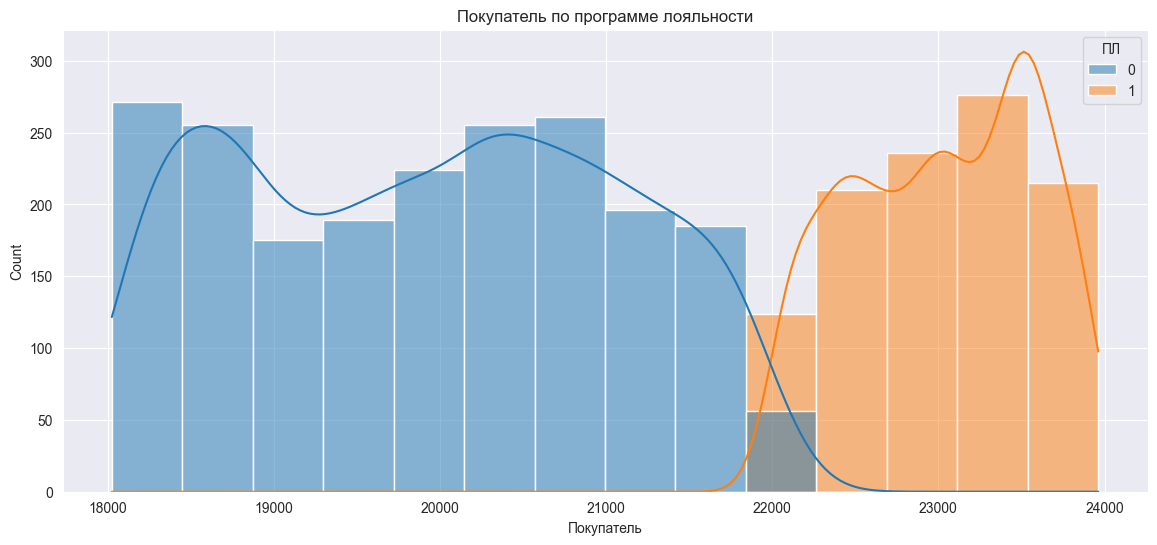

In [122]:
#строим график
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sns.histplot(data=df_purchase_filter, x='Покупатель', hue="ПЛ", kde=True)
plt.title('Покупатель по программе лояльности')
plt.show()

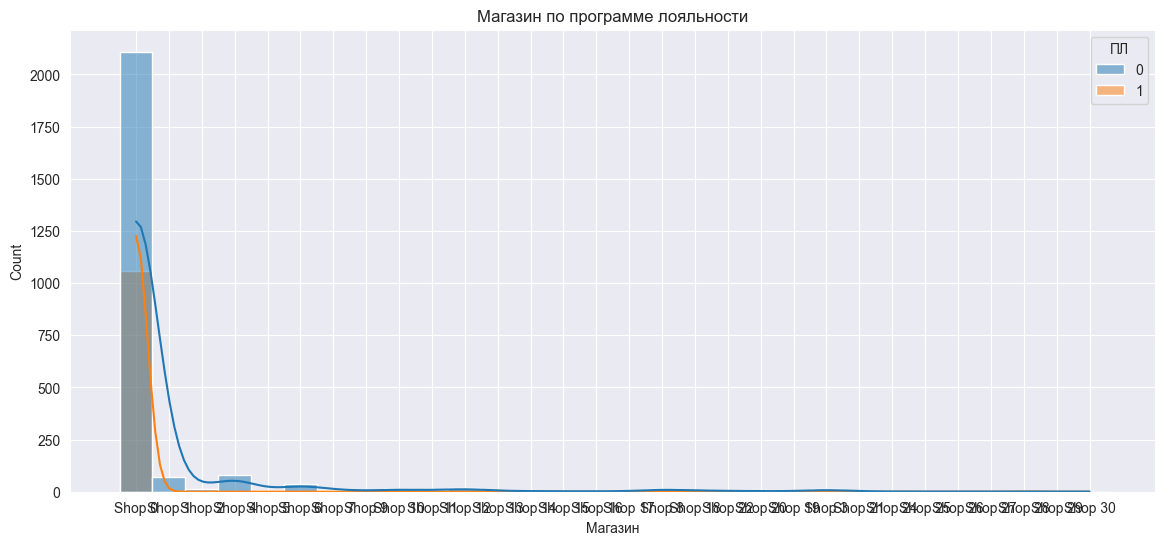

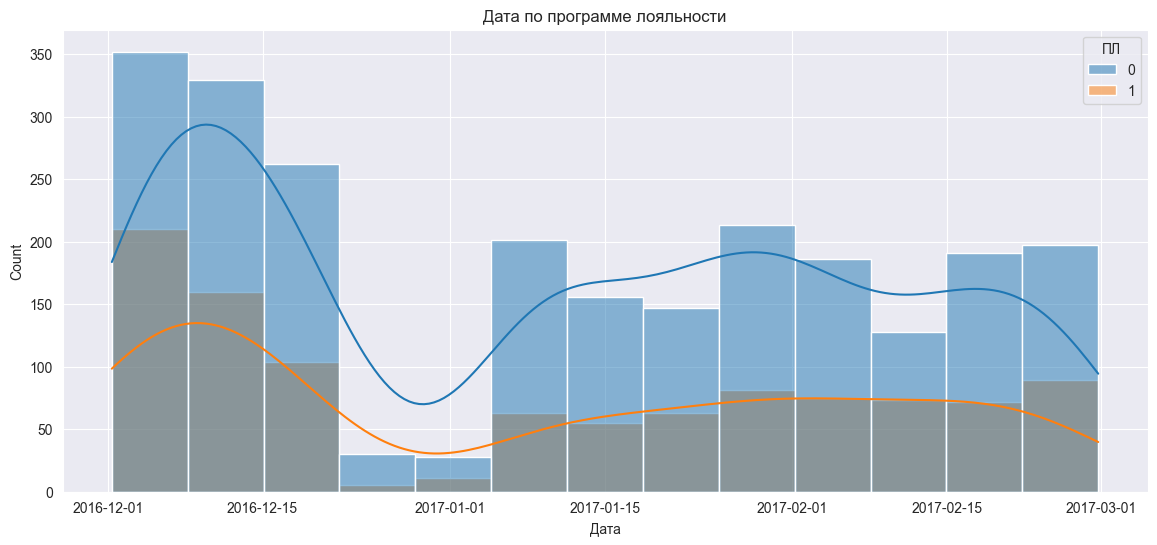

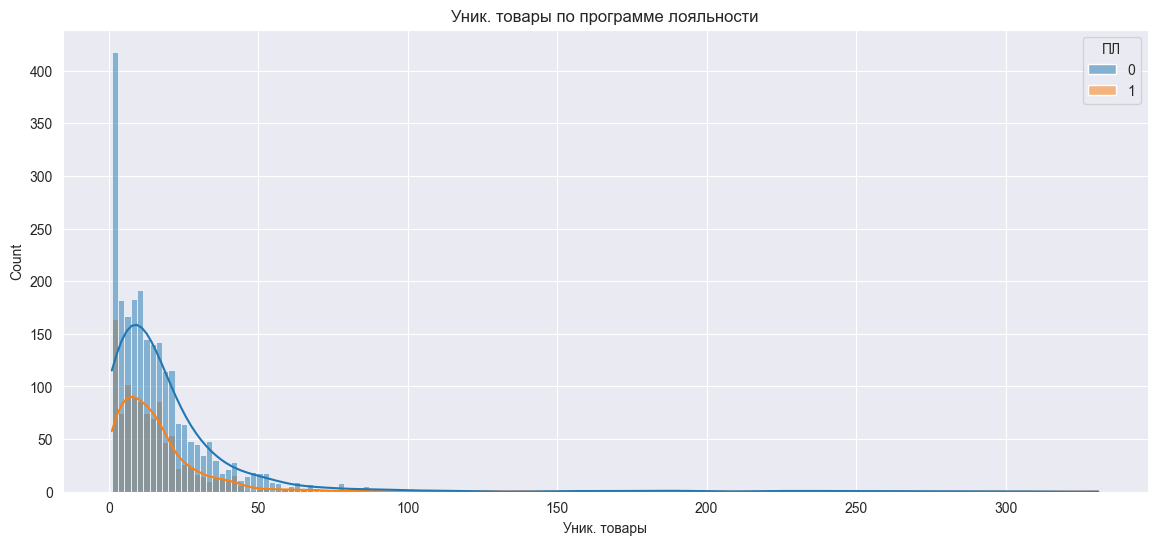

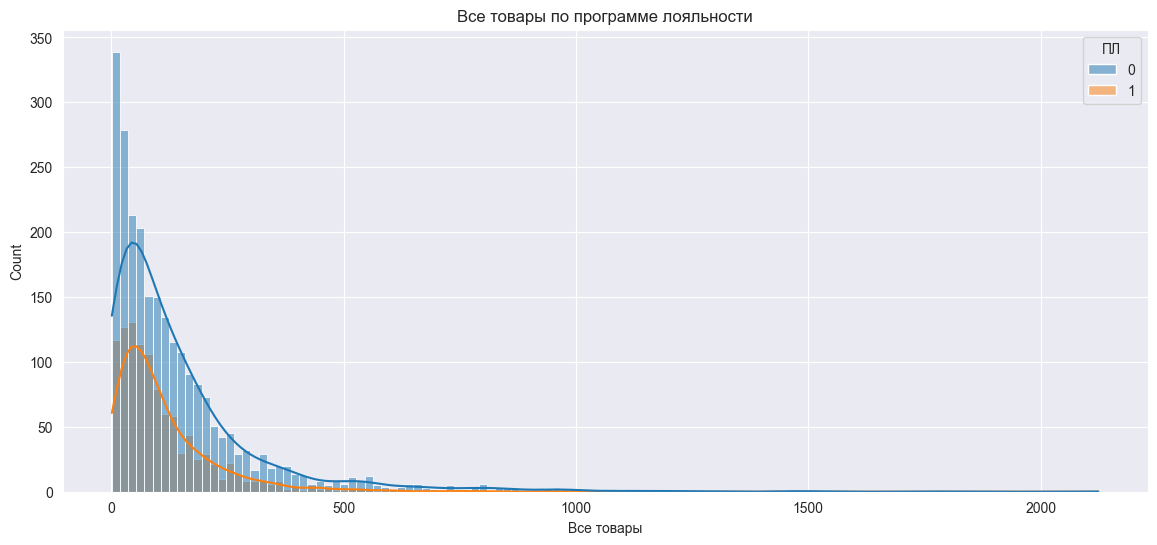

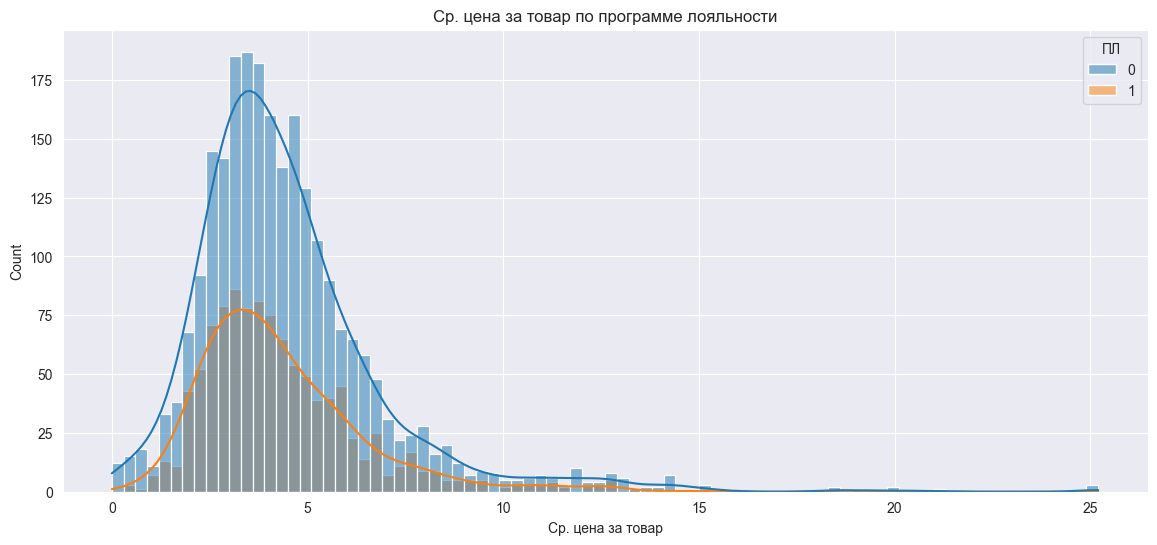

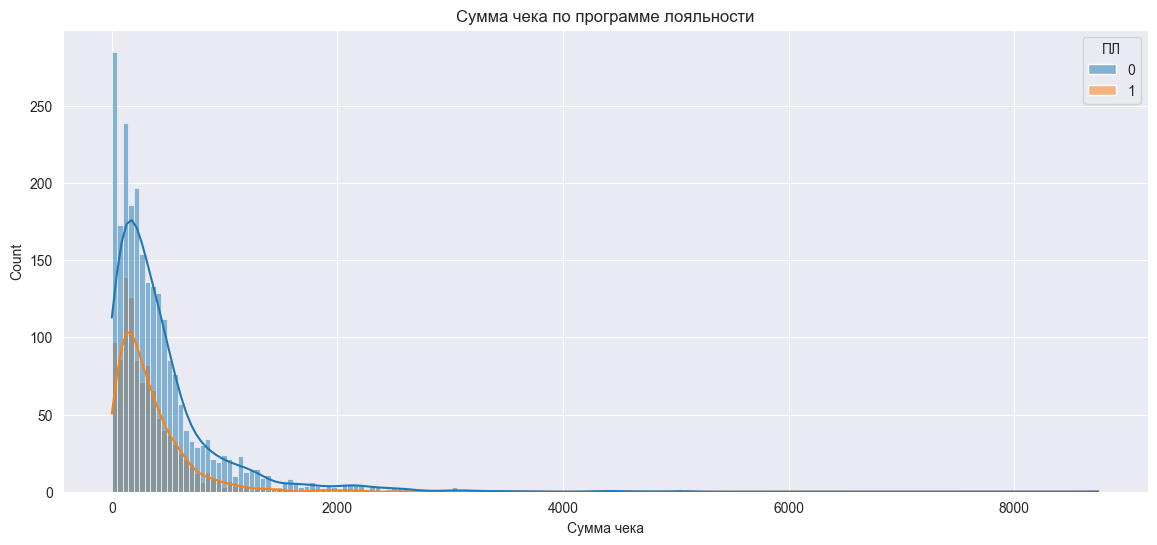

In [123]:
# цикл по признакам
for column in ['Магазин', 'Дата', 'Уник. товары', 'Все товары', 
               'Ср. цена за товар', 'Сумма чека']:
    sns.set_style("darkgrid")
    plt.figure(figsize=(14,6))
    sns.histplot(data=df_purchase, x=column, hue="ПЛ", kde=True)
    plt.title(f'{column} по программе лояльности')
    plt.show()

На графиках распределения покупки по программе лояльности (ПЛ) выделены оранжевым, а без - голубым.\
Все распределения по ПЛ и без схожи. График средней цены за товар у попкупок по ПЛ, немного смещен влево, значит покупаются более недорогие товары.\
По распределению по магазинам видно, что покупки по ПЛ делались только в Shop 0, в других ей пользуются в единичных случаях.

На графике Покупатель сначала идут покупатели, которые не пользовались ПЛ, а с id 22000, которые пользовались.\
Посмотрим есть ли пользователи, которые находятся в двух категориях сразу, так как на графике есть пересечение.\
Для этого сгруппируем таблицу по customer_id, посчитаем число уникальных значений loyalty_program, выведем строки, где значение больше 1.

In [124]:
data_purchase.groupby('customer_id').agg({'loyalty_program': 'nunique'}).query('loyalty_program > 1')

,loyalty_program
customer_id,


Пересекающихся значений нет

Для получения точных значений, выведем числовые характеристики полученной таблицы для двух категорий методом describe 

In [125]:
# покупки по программе лояльности
print('Программа лояльности:')
display(df_purchase[df_purchase['ПЛ'] == 1].describe().round(1))
# обычные покупки
print('Обычные покупатели:')
display(df_purchase[df_purchase['ПЛ'] == 0].describe().round(1))

Программа лояльности:


,Покупатель,Уник. товары,Все товары,Ср. цена за товар,Сумма чека,ПЛ
count,1061.0,1061.0,1061.0,1061.0,1061.0,1061.0
mean,23025.8,15.5,111.1,4.4,329.8,1.0
std,549.3,14.9,111.2,2.2,320.3,0.0
min,22005.0,1.0,1.0,0.4,2.5,1.0
25%,22554.0,6.0,39.0,2.9,125.9,1.0
50%,23056.0,12.0,78.0,3.9,240.1,1.0
75%,23520.0,20.0,143.0,5.3,432.3,1.0
max,23962.0,138.0,949.0,19.8,2827.3,1.0


Обычные покупатели:


,Покупатель,Уник. товары,Все товары,Ср. цена за товар,Сумма чека,ПЛ
count,2420.0,2420.0,2420.0,2420.0,2420.0,2420.0
mean,95913.1,20.6,145.5,4.5,437.3,0.0
std,183898.8,32.6,181.8,2.5,546.3,0.0
min,18026.0,1.0,1.0,0.0,0.0,0.0
25%,19087.0,6.0,35.0,3.0,127.0,0.0
50%,20285.0,12.0,91.5,4.0,284.2,0.0
75%,21398.0,23.0,182.0,5.3,527.8,0.0
max,545217.0,331.0,2124.0,25.2,8743.8,0.0


### Вывод:
id пользователей по программе лояльности начинаются с номера 22005.\
Средние по числу уникальных товаров в чеке, числу всех товаров, средней цены на товар и среднего чека ниже у клиентов по ПЛ.

Средний чек по программе лояльности: 329.8\
Средний чек обычного покупателя: 437.3\
Разница в среднем чеке может быть из-за скидки по программе лояльности, также в количестве товаров,\
может покупатели по ПЛ чаще заходят, вследствие чего покупают меньше.

### Число чеков по покупателям

Чтобы посмотреть на количесво чеков по покупателям сгруппируем таблицу по customer_id и посчитаем уникальные чеки purchase_id,\
построим гистограмму с разделением по программе лояльности.

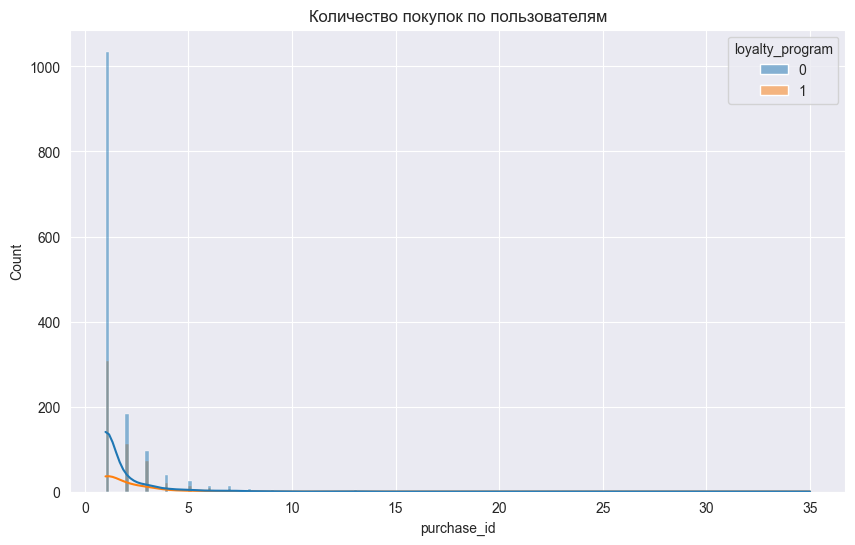

In [126]:
plt.figure(figsize=(10,6))
sns.histplot(data=data_purchase.groupby('customer_id').agg({'purchase_id': 'nunique', 'loyalty_program': 'max'}), 
             x='purchase_id', hue="loyalty_program", kde=True)
plt.title('Количество покупок по пользователям')
plt.show()

Распределения покупок похожи.

### Вывод
Клиентов с программой лояльности 33.7%. Среднее число товаров - 7 и средняя цена товара - 4, у обеих выборок одинаковы.\
По средним значениям разницы в покупках по программе лояльности и без - нет.
Все распределения по чекам по программе лояльности и без схожи.\
По распределению по магазинам видно, что покупки по программе лояльности делались в Shop 0, в других ей почти не пользуются.

Средние по числу уникальных товаров в чеке, числу всех товаров, средней цены за товар и среднего чека ниже у клиентов по программе лояльности.

Средний чек по программе лояльности: 329.8\
Средний чек обычного покупателя: 437.3\
Разница в среднем чеке может быть из-за скидки по программе лояльности, также в количестве приобретаемых товаров.\
Распределение количества покупок у покупателей по программе лояльности и без очень схоже, то есть они одинаково часто совершают покупки.

## Проверка статистических гипотез.

По итогам исследовательского анализа данных и анализа программы лояльности были выдвинуты некоторые гипотезы.\
Сформулируем их и проверим с помощью библиотеки scipy.stats,\
используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам ttest_ind.

Соберем данные по чекам в таблицу data_hypothesis, разделим данные на покупки по программе лояльности и без в переменные data_loyalty и data_not_loyalty.

In [127]:
# сводная таблица 
data_hypothesis = data_purchase.groupby('purchase_id').agg(
    {'customer_id': 'max', 'quantity': 'sum', 'price': 'mean', 'total': 'sum', 
     'shop_id': 'max', 'purchase_date': 'max', 'loyalty_program': 'max'}
).reset_index()

# разделение на датасеты с программой лояльности и без
data_loyalty = data_hypothesis.query('loyalty_program == 1')
data_not_loyalty = data_hypothesis.query('loyalty_program == 0')

### Проверить гипотезу: средний чек участников программы лояльности выше, чем у остальных покупателей.

Для проверки гипотезы импользуем t-тест для следующих статистических гипотез:

(Н0) Нулевая гипотеза: между средними чеками нет зачимой разницы\
(Н1) Альтернативная гипотеза: в среднем чек участников программы лояльности выше, чем у остальных покупателей

Посчитаем дисперсию и стандартное отклонение для суммы покупки, столбец total

In [128]:
# дисперсия и стандартное отклонение
print('Программа лояльности:', data_loyalty['total'].agg(['var','std']).round(2), sep='\n')
print('\nОбычные покупки:', data_not_loyalty['total'].agg(['var','std']).round(2), sep='\n')

Программа лояльности:
var    102622.18
std       320.35
Name: total, dtype: float64

Обычные покупки:
var    298431.10
std       546.29
Name: total, dtype: float64


Дисперсия и стандартное отклонение сильно отличаются, укажем параметр equal_var = False.

In [129]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(data_loyalty['total'], 
                       data_not_loyalty['total'], equal_var = False)
print('p-значение: ', results.pvalue)
#односторонний тест p/2
# если p-value/2 окажется меньше alpha - отвегнем гипотезу
if results.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.406615489019066e-13
Отвергаем нулевую гипотезу


Гипотеза отклоняется на нулевом уровне.

Построим диаграмму распределения величин для наглядности:

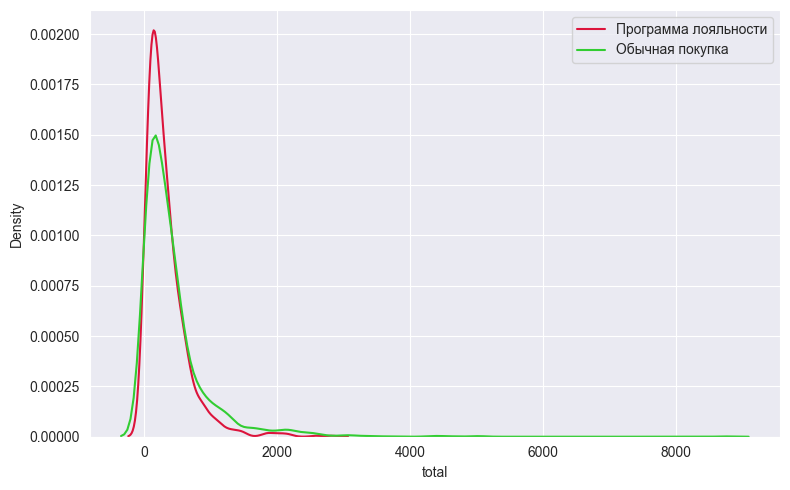

In [130]:
# фунция построания kdeplot
def gen_kdeplot(data_1, data_2):
    # первое значение по программе лояльности, второе без
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.kdeplot(data=data_1, color='crimson', label='Программа лояльности', ax=ax)
    sns.kdeplot(data=data_2, color='limegreen', label='Обычная покупка', ax=ax)
    ax.legend()
    plt.tight_layout()
    plt.show()

gen_kdeplot(data_loyalty['total'], data_not_loyalty['total'])

### Проверить гипотезу: среднее количество покупок участников программы лояльности выше, чем у остальных покупателей.

Для проверки гипотезы сгруппируем данные по пользователям и посчитаем количество чеков, покупок.

Проведем t-тест для следующих статистических гипотез:

(Н0) Нулевая гипотеза: между средним количеством покупок нет зачимой разницы\
(Н1) Альтернативная гипотеза: среднее количество покупок участников программы лояльности выше, чем у остальных покупателей.

Посчитаем дисперсию и стандартное отклонение для количества покупок по пользователям.

In [131]:
# расчет числа покупок по пользователю
data_loyalty_count_purchase = data_loyalty.groupby('customer_id').agg({'purchase_id': 'count'})['purchase_id']
data_not_loyalty_count_purchase = data_not_loyalty.groupby('customer_id').agg({'purchase_id': 'count'})['purchase_id']

# дисперсия и стандартное отклонение
print('Программа лояльности:', data_loyalty_count_purchase.agg(['var','std']).round(2), sep='\n')
print('\nОбычные покупки:', data_not_loyalty_count_purchase.agg(['var','std']).round(2), sep='\n')

Программа лояльности:
var    4.41
std    2.10
Name: purchase_id, dtype: float64

Обычные покупки:
var    4.19
std    2.05
Name: purchase_id, dtype: float64


Дисперсия и стандартное отклонение отличаются, укажем параметр equal_var = False

In [132]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(data_loyalty_count_purchase, data_not_loyalty_count_purchase, equal_var = False)
print('p-значение: ', results.pvalue)
# если p-value/2 окажется меньше alpha - отвегнем гипотезу
if results.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.016238982534866962
Отвергаем нулевую гипотезу


Гипотеза отклоняется на нулевом уровне.

Построим диаграмму распределения величин для наглядности: 

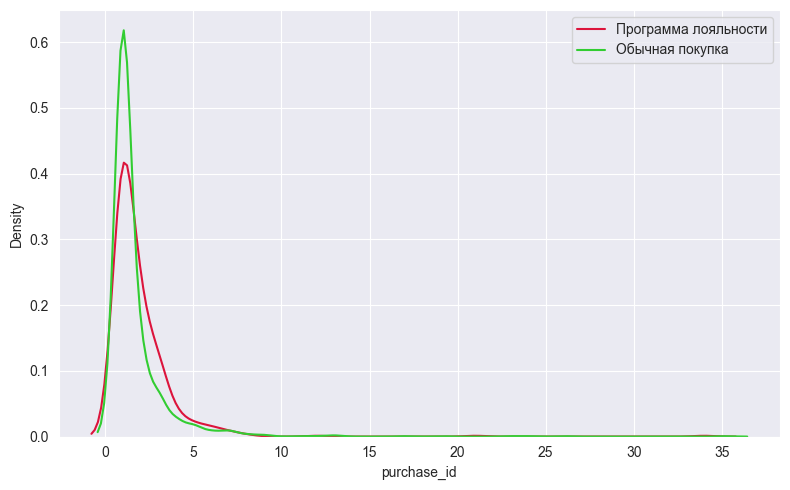

In [133]:
gen_kdeplot(data_loyalty_count_purchase, data_not_loyalty_count_purchase)

### Проверить гипотезу: общая сумма денег, которую  клиент  принёс компании со всех своих покупок участников программы лояльности выше, чем у остальных покупателей.

Для проверки гипотезы сгруппируем данные по пользователям и посчитаем сумму всех покупок

Проведем t-тест для следующих статистических гипотез:

(Н0) Нулевая гипотеза: общая сумма денег, которую  клиент принёс компании со всех своих покупок участников программы лояльности и без нее не  различаются\
(Н1) Альтернативная гипотеза: общая сумма денег, которую  клиент в принёс компании со всех своих покупок участников программы лояльности выше, чем у остальных покупателей.

Посчитаем дисперсию и стандартное отклонение для суммы всех покупок на пользователя.

In [134]:
#расчет суммы всех покупок по пользователю
data_loyalty_sum_total = data_loyalty.groupby('customer_id').agg({'total': 'sum'})['total']
data_not_loyalty_sum_total = data_not_loyalty.groupby('customer_id').agg({'total': 'sum'})['total']

# дисперсия и стандартное отклонение
print('Программа лояльности:', data_loyalty_sum_total.agg(['var','std']).round(2), sep='\n')
print('\nОбычные покупки:', data_not_loyalty_sum_total.agg(['var','std']).round(2), sep='\n')

Программа лояльности:
var    638923.37
std       799.33
Name: total, dtype: float64

Обычные покупки:
var    1536013.38
std       1239.36
Name: total, dtype: float64


Дисперсия и стандартное отклонение отличаются, у нас нет оснований считать распределения равными, укажем параметр equal_var = False

In [135]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(data_loyalty_sum_total, data_not_loyalty_sum_total, equal_var = False)
print('p-значение: ', results.pvalue)
# если p-value окажется меньше alpha - отвегнем гипотезу
if results.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03690611253354859
Отвергаем нулевую гипотезу


Гипотеза отклоняется на нулевом уровне.

Построим диаграмму распределения величин для наглядности с помощью get_kdeplot()

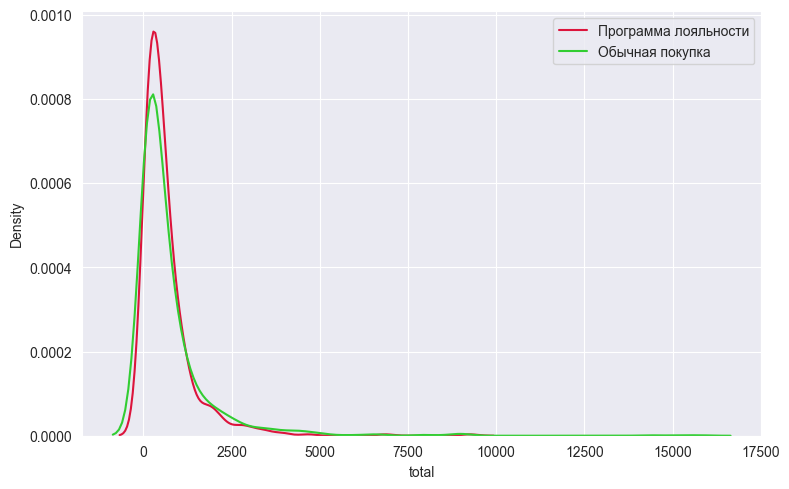

In [136]:
gen_kdeplot(data_loyalty_sum_total, data_not_loyalty_sum_total)

### Вывод
По итогам проверки, следующие статистические гипотезы, отклонены на нулевом уровне:

между средними чеками нет значимой разницы\
между средним количеством покупок нет значимой разницы\
общая сумма денег, которую  клиент принёс компании со всех своих покупок не  различаются


## Общий вывод:

Проведен анализ эффективности сети строительных магазинов «Строили, строили и наконец построили» за период с 1 декабря 2016г по 28 февраля 2017 г.

Всего в сети 31 магазин,"Shop 0" лидирует по параметрам продаж. Количество покупок в нем в 40 раз больше, чем в других магазинах.\
Это либо флагманский магазин, либо склад, через него могут проходить онлайн-заказы с самовывозом и доставкой.\
Покупки по программе лояльности делались в Shop 0, в других ей почти не пользуются.\
По количеству покупок и выручке среди остальных магазинов популярнее № 4, 1, 6, 8, 12.

Всего 4280 чеков, из них 3473 чеков покупок. Товаров - 5832. Средний чек, составляет 404. Медианное значение - 270\
Уникальных покупателей - 1966, наибольшее количество товаров у одного покупателя - 796.\
Средние: чек - 404 (медиана 270), товаров в чеке - 135, уникальных -19\
Большинство покупок совершается без программы лояльности, по ней куплено 23% товаров.\
В первой половине декабря покупок в 2 раза больше, чем в январе и феврале. Пятница самый высокий день продаж.

Средний чек по программе лояльности: 329.8, средний чек обычного покупателя: 437.3\
Клиентов с программой лояльности 33.7%. Среднее число товаров - 7 и средняя цена товара - 4, у обеих выборок одинаковы.\
Распределение количества покупок у покупателей по программе лояльности и без очень схоже, то есть они одинаково часто совершают покупки.












### Рекомендации по программе лояльности магазина:

Необходимо пересмотреть условия программы лояльности.

Стимулировать покупать больше с помощью накопительных программ,\
введения схем покупок по акциям и календарным скидкам,\
предлагать  бесплатную доставку при большом количестве и стоимости товара,\
скидки на доставку при определенном накоплении.  
